# **I. Introduction**

**Name**    : Maulana Yusuf Taufiqurrahman

# **II. Import Library Packages**

In [22]:
# Data Preparation
import pandas as pd
import numpy as np

# Visualization Tools
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Packages
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
# from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX

# **III. Data Loading**

### **A. Load the CSV File**

In [23]:
# Read the CSV file
df_org = pd.read_csv('sales_forecasting.csv')

# Create a copy
df_copy = df_org.copy()

# Show the data
df_copy

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


### **B. Summary of the Dataset**

In [24]:
# Show the info of dataset
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

### **C. Check the Data Shape**

In [25]:
# Check the data shape
df_copy.shape

(9800, 18)

### **D. Check the Missing Values**

In [26]:
# Check the missing values
df_copy.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

### **E. Check the Duplicates**

In [27]:
# Check the Duplicates
df_copy.duplicated().sum()

0

### **F. Check the Cardinality**

In [28]:
# Check the cardinality
df_copy.nunique()

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

### **G. Check the Skewness**

In [29]:
# Take numerical columns only
numerical_cols = df_copy.select_dtypes(include = [np.number]).columns

# Count the skewness
skewness = df_copy[numerical_cols].skew()

# Create a def function
def interpret_skew(val):
    if val > 0.5:
        return 'Right Skewed'
    elif val < -0.5:
        return 'Left Skewed'
    else:
        return 'Approximately Normal'

# Create a dataframe
skewness_df = pd.DataFrame({
    'Skewness': skewness,
    'Interpretation': skewness.apply(interpret_skew)
})

# Show the output
print(skewness_df)

              Skewness        Interpretation
Row ID        0.000000  Approximately Normal
Postal Code  -0.131295  Approximately Normal
Sales        12.983483          Right Skewed


# **IV. Data Preprocessing**

### **A. Convert the Data Type**

In [30]:
# Convert the data type: Order Date & Ship Date
df_copy['Order Date'] = pd.to_datetime(df_copy['Order Date'], dayfirst = True)
df_copy['Ship Date'] = pd.to_datetime(df_copy['Ship Date'], dayfirst = True)

# Check the latest info
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

### **B. Drop an Unrelated Column**

In [33]:
# Drop Row ID column
df_copy.drop(columns = ['Row ID'], inplace = True)

# Show the dataset
df_copy

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


### **C. Analyzing the Missing Postal Codes**

##### **C.1. Check the Missing Postal Codes**

In [34]:
# Check the missing postal codes
df_copy[df_copy['Postal Code'].isnull()][['City', 'State']]

,City,State
2234,Burlington,Vermont
5274,Burlington,Vermont
8798,Burlington,Vermont
9146,Burlington,Vermont
9147,Burlington,Vermont
9148,Burlington,Vermont
9386,Burlington,Vermont
9387,Burlington,Vermont
9388,Burlington,Vermont
9389,Burlington,Vermont


##### **C.2. Make it Appear Only Once**

In [ ]:
# Drop the duplicates of City and State: Burlington & Vermont
df_copy[df_copy['Postal Code'].isnull()][['City', 'State']].drop_duplicates()

,City,State
2234,Burlington,Vermont


##### **C.3. Fill the Missing Values of Burlington**

In [38]:
# Postal Code of Burlington
burlington_pc = 5401

# Input the missing postal codes
df_copy.loc[(df_copy['City'] == 'Burlington') & 
            (df_copy['State'] == 'Vermont'), 'Postal Code'] = burlington_pc

# Check the latest info
df_copy.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

##### **C.4. Convert the Data Type of Postal Code**

In [44]:
# Convert from float into int
df_copy['Postal Code'] = df_copy['Postal Code'].astype(int)

# Show the info of Postal Code
df_copy['Postal Code'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9800 entries, 0 to 9799
Series name: Postal Code
Non-Null Count  Dtype
--------------  -----
9800 non-null   int32
dtypes: int32(1)
memory usage: 38.4 KB


# **V. Exploratory Data Analysis (EDA)**

### **A. Sales Analysis: Category & Sub-Category**

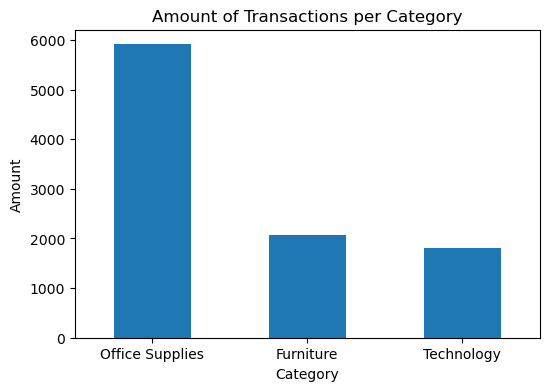

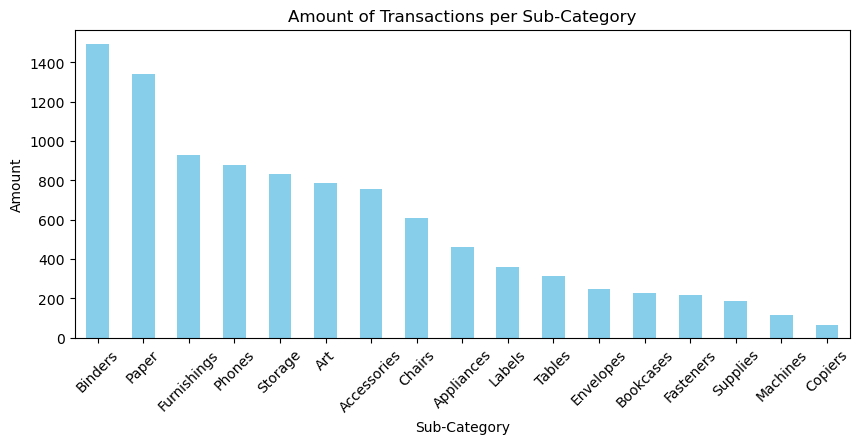

In [55]:
# Sales Analysis Category

# Create the visualization
plt.figure(figsize = (6,4))
df_copy['Category'].value_counts().plot(kind = 'bar')

# Add title and labels
plt.title('Amount of Transactions per Category')
plt.xlabel('Category')
plt.ylabel('Amount')

# Make the text in 0 degree
plt.xticks(rotation = 0)

# Show the visualization
plt.show()


# Sales Analysis Sub-Category

# Create the visualization
plt.figure(figsize = (10,4))
df_copy['Sub-Category'].value_counts().plot(kind = 'bar', color = 'skyblue')

# Add title and labels
plt.title('Amount of Transactions per Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Amount')

# Make the text in 45 degrees
plt.xticks(rotation = 45)

# Show the visualization
plt.show()